In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Steps to Create a Decision Tree
# 1- Select the Best Feature
# 2- Calculate Entropy or Gini
# 3- Recursively Split
# 4- Assign Labels

class DecisionStump:
    """
    A decision stump classifier for multi-class classification problems (depth = 1).
    """
    
    def __init__(self):
        self.feature = None
        self.threshold = None
        self.value_left = None
        self.value_right = None

    def fit(self, X, y):
        """
        Fits a decision stump to the dataset (X, y).
        """
        best_gain = -1
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]
                if len(left_y) and len(right_y):
                    left_weight = len(left_y) / len(y)
                    right_weight = 1 - left_weight
                    gain = self._entropy(y) - (left_weight * self._entropy(left_y) + right_weight * self._entropy(right_y))
                    if gain > best_gain:
                        best_gain = gain
                        self.feature = feature_index
                        self.threshold = threshold
                        self.value_left = np.bincount(left_y).argmax()
                        self.value_right = np.bincount(right_y).argmax()

    def predict(self, X):
        """
        Predicts class labels for samples in X.
        """
        return np.where(X[:, self.feature] <= self.threshold, self.value_left, self.value_right)

    def _entropy(self, y):
        """
        Computes entropy for a set of labels.
        """
        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

X, y = iris.data, iris.target

print(f"Iris features: {iris.feature_names}")
print(f"Iris target: {iris.target_names}")

Iris features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris target: ['setosa' 'versicolor' 'virginica']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.flatten(), test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (120, 4), y_train: (120,)
Shape of X_test: (30, 4), y_test: (30,)


In [5]:
from sklearn.metrics import accuracy_score, f1_score

stump = DecisionStump()
stump.fit(X_train, y_train)

stump_predictions = stump.predict(X_test)

print(f"Decision Stump Accuracy: {accuracy_score(y_test, stump_predictions):.3f}")
print(f"Decision Stump F1-Score: {f1_score(y_test, stump_predictions, average='weighted'):.3f}")

Decision Stump Accuracy: 0.633
Decision Stump F1-Score: 0.520


Sklearn DT Accuracy: 0.967
Sklearn DT F1-Score: 0.966


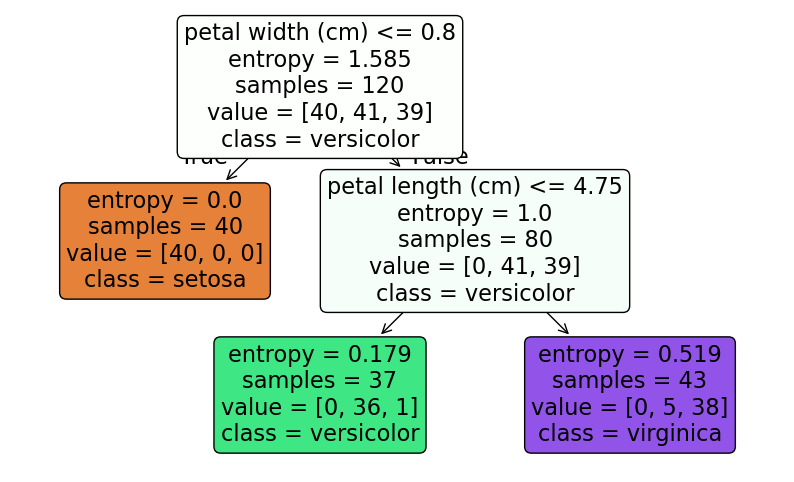

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_sklearn = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_sklearn.fit(X_train, y_train)

dt_skl_predictions = dt_sklearn.predict(X_test)

print(f"Sklearn DT Accuracy: {accuracy_score(y_test, dt_skl_predictions):.3f}")
print(f"Sklearn DT F1-Score: {f1_score(y_test, dt_skl_predictions, average='weighted'):.3f}")

plt.figure(figsize=(10,6))
plt.title("Decision Tree Visualization - Sklearn")
plot_tree(dt_sklearn, feature_names=list(iris.feature_names), class_names=list(iris.target_names), filled=True, rounded=True)
plt.show()